In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Graficos
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

# Procesamiento de los datos
from numpy import array
from sklearn.decomposition import TruncatedSVD
from numpy import diag
from numpy import zeros
from scipy.linalg import svd

In [18]:
df = pd.DataFrame(np.array([[7, 6.5, 9.2, 8.6, 8],
                            [7.5, 9.4, 7.3, 7, 7],
                            [7.6, 9.2, 8, 8, 7.5],
                            [5, 6.5, 6.5, 7, 9],
                            [6, 6, 7.8, 8.9, 7.3],
                            [7.8, 9.6, 7.7, 8, 6.5],
                            [6.3, 6.4, 8.2, 9, 7.2],
                            [7.9, 9.7, 7.5, 8, 6],
                            [6, 6, 6.5, 5.5, 8.7],
                            [6.8, 7.2, 8.7, 9, 7]]),
                  index = ['Lucia', 'Pedro', 'Ines', 'Luis', 'Andres', 'Ana', 'Carlos', 'Jose', 'Sonia', 'Maria'],
                  columns = ['Matematicas', 'Ciencias', 'Español', 'Historia', 'EdFisica'])
df

,Matematicas,Ciencias,Español,Historia,EdFisica
Lucia,7.0,6.5,9.2,8.6,8.0
Pedro,7.5,9.4,7.3,7.0,7.0
Ines,7.6,9.2,8.0,8.0,7.5
Luis,5.0,6.5,6.5,7.0,9.0
Andres,6.0,6.0,7.8,8.9,7.3
Ana,7.8,9.6,7.7,8.0,6.5
Carlos,6.3,6.4,8.2,9.0,7.2
Jose,7.9,9.7,7.5,8.0,6.0
Sonia,6.0,6.0,6.5,5.5,8.7
Maria,6.8,7.2,8.7,9.0,7.0


In [20]:
labels = df.index
labels

Index(['Lucia', 'Pedro', 'Ines', 'Luis', 'Andres', 'Ana', 'Carlos', 'Jose',
       'Sonia', 'Maria'],
      dtype='object')

# 2 Dimensiones

In [5]:
U, s, VT = svd(df)  # Obtencion de matrices cuyo producto arroja la matriz A
Sigma = zeros((df.shape[0], df.shape[1])) # Creacion de Matriz de ceros de la misma dimension de A
Sigma[:df.shape[1], :df.shape[1]] = diag(s)

In [10]:
n_elementos = 2

UReduced2 = U[:, :n_elementos]
SigmaReduced2 = Sigma[:n_elementos, :n_elementos]
VTReduced2 = VT[:n_elementos, :]
DFReduced2 = UReduced2.dot(SigmaReduced2.dot(VTReduced2))
print('Matriz A Transformada')
print(DFReduced2)

Matriz A Transformada
[[6.65563617 6.93068907 8.45496902 8.64041633 8.61053016]
 [7.50259774 9.15546106 7.47627701 7.62801112 6.39154032]
 [7.66288835 9.06253486 8.0774837  8.24477427 7.24032869]
 [5.61309793 5.65867129 7.41578628 7.58014066 7.72189396]
 [6.05941975 6.24591247 7.7953721  7.96693512 7.99698132]
 [7.83156613 9.60455223 7.73118336 7.88753689 6.55416982]
 [6.35785122 6.70021013 7.95486409 8.12861624 8.02875678]
 [7.86973795 9.80171752 7.53881312 7.68951159 6.21497236]
 [5.48053658 5.67061811 7.01789357 7.17215282 7.18015541]
 [6.86687283 7.53702066 8.13213661 8.30697925 7.93006916]]


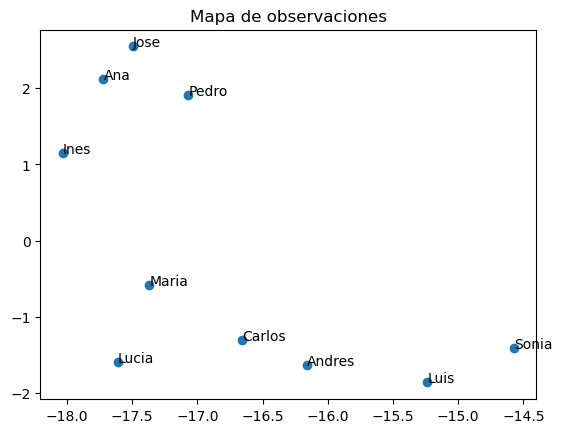

In [22]:
T2 = UReduced2.dot(SigmaReduced2)

# Agregamos Etiquetas
df = pd.DataFrame(T2, columns = ['a', 'b'])
x = df.iloc[:,0]
y = df.iloc[:, 1]
x = x.to_numpy()
y = y.to_numpy()

fig, ax = plt.subplots()
ax.set_title('Mapa de observaciones')
ax.scatter(x,y)

for i, txt in enumerate(labels):
    ax.annotate(txt, (x[i], y[i]))

# 3 Dimensiones

In [25]:
n_elements = 3

UReduced3 = U[:, :n_elements]
SigmaReduced3 = Sigma[:n_elements, :n_elements]
VTReduced3 = VT[:n_elements, :]

# Para reconstruir la matriz original
AReduced3 = UReduced3.dot(SigmaReduced3.dot(VTReduced3))
print('Matriz A Transformada')
print(AReduced3)
# Mismos valores del DT Original (solo cambio de decimales por operaciones entre matrices)

Matriz A Transformada
[[6.65245886 6.72762726 8.69042319 9.08512051 8.09898421]
 [7.50649243 9.40437093 7.1876611  7.08289996 7.01858503]
 [7.66453175 9.1675645  7.95569976 8.01475998 7.50491554]
 [5.6205042  6.13200674 6.8669445  6.54353881 8.91430342]
 [6.05471948 5.94551744 8.14368606 8.62479847 7.24023707]
 [7.83115817 9.57847935 7.76141538 7.94463634 6.48848799]
 [6.35253602 6.36051578 8.34874639 8.87254488 7.17301112]
 [7.86825556 9.7069775  7.64866605 7.89699168 5.97630674]
 [5.49031524 6.29557293 6.29324613 5.80350542 8.75451889]
 [6.86123771 7.17687926 8.54972766 9.09568679 7.02281405]]


In [27]:
T3 = UReduced3.dot(SigmaReduced3)

from mpl_toolkits import mplot3d
%matplotlib inline

df3 = pd.DataFrame(T3, columns = ['a', 'b', 'c'])
df3

,a,b,c
0,-17.608552,-1.598552,0.745737
1,-17.070743,1.906364,-0.914113
2,-18.032489,1.150281,-0.385718
3,-15.236045,-1.862909,-1.738307
4,-16.163433,-1.631878,1.103190
5,-17.720651,2.121542,0.095752
6,-16.655978,-1.307170,1.247515
7,-17.495911,2.547099,0.347929
8,-14.574976,-1.416864,-2.295124
9,-17.367933,-0.582289,1.322606


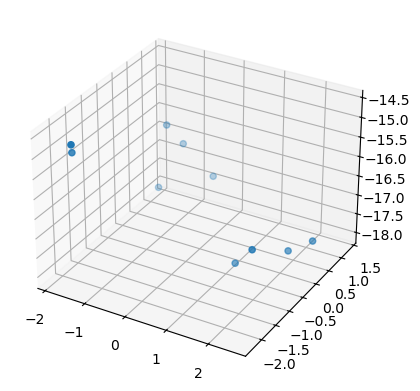

In [29]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
xline = df3['b']
yline = df3['c']
zline = df3['a']
ax.scatter3D(xline, yline, zline)

# Conclusion

Creo que el modelo de descomposicion de valores singulares (SVD) nos da mucho mas claridad de como se comportan nuestras variables que el modelo de Componentes principales (PCA), porque al tener la profundidad de la 3er dimension, podemos diferenciar datos que en 2 dimensiones es imposible de perisbirlos y con esto podemos tener mayor informacion para una toma de decisiones mas acertada.
Aunque creo que al menos en este ejemplo, la perdida de informacion (decimales) es mas pronunciada que el ejercicio anterior, creo que a veces es bueno sacrificar un poco de precision para poder tener una mejor visualizacion de la informacion.

En este caso creo que los resultados son similares ya 